In [1]:
import os
os.chdir("..")
import torch
import numpy as np
import matplotlib.pyplot as plt
from gp_dataloader import GPDataGenerator
from utils import plot_gp_curves

torch.manual_seed(1)
np.random.seed(1)

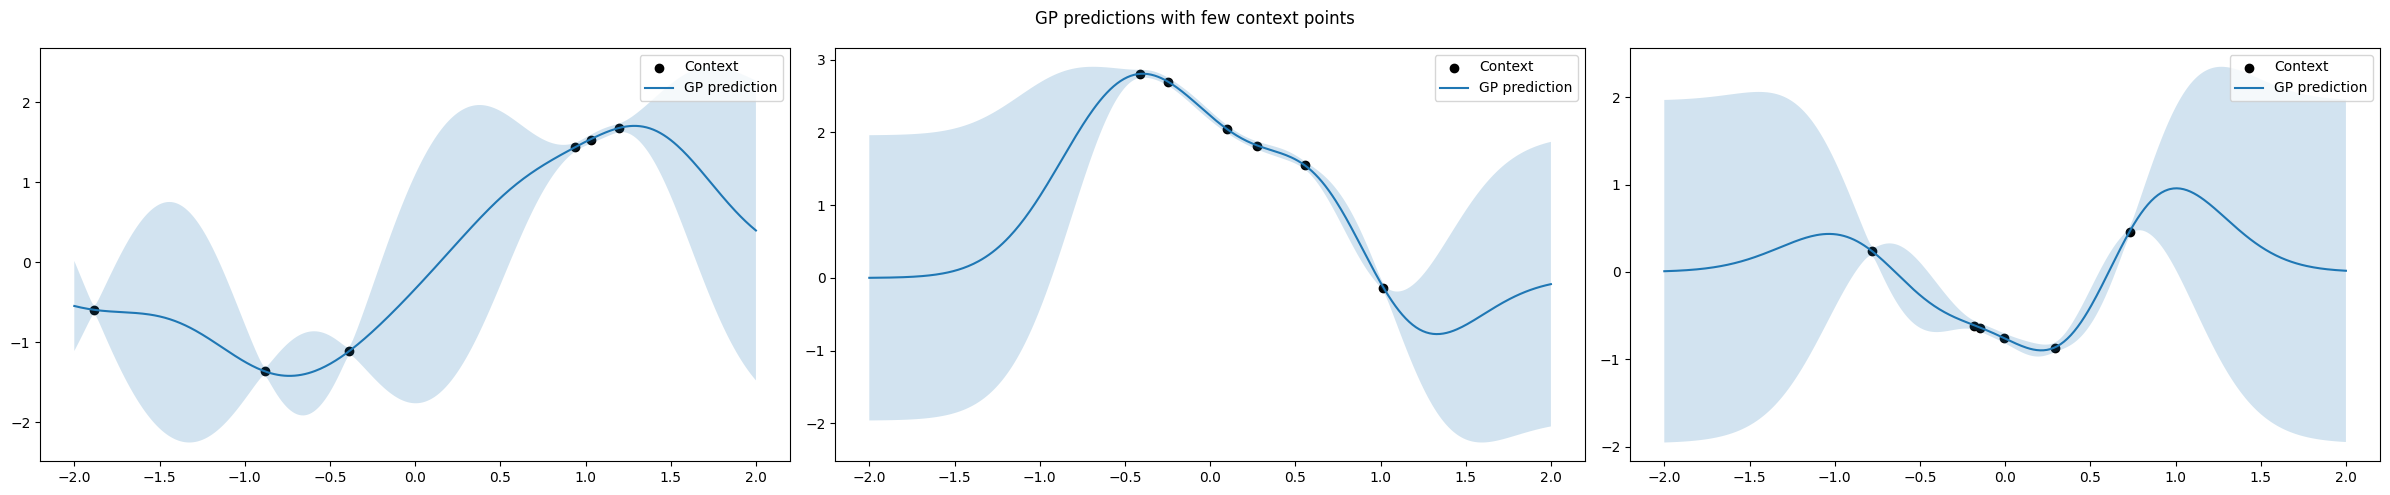

In [2]:
# GP predictions with few context points

gen_few_context = GPDataGenerator(max_n_context=7)
np_tuple_few_context = gen_few_context.generate_batch()

plot_gp_curves(gen_few_context.gp, np_tuple_few_context, 3, "GP predictions with few context points")

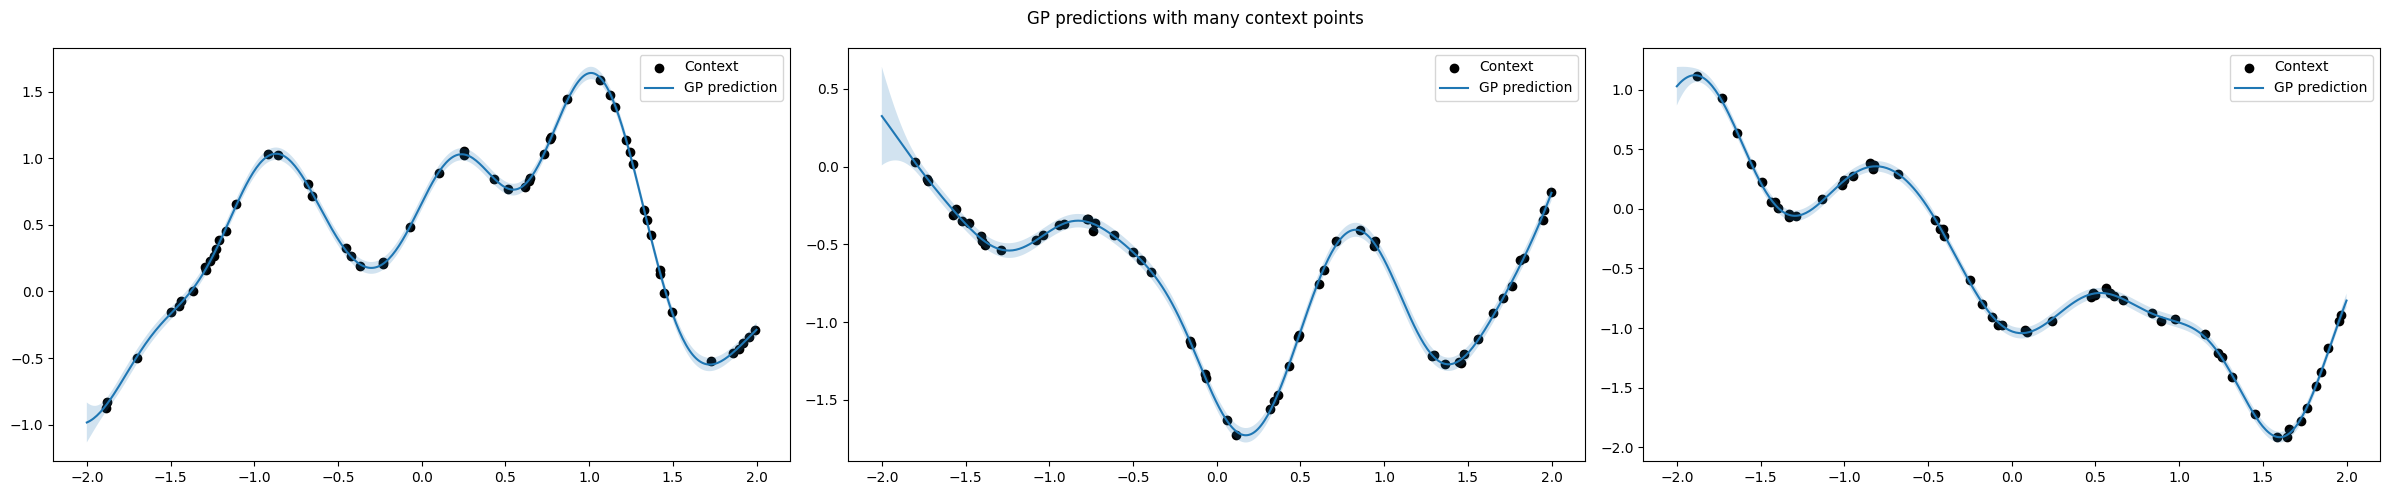

In [3]:
# GP predictions with many context points

gen_many_context = GPDataGenerator()
np_tuple_many_context = gen_many_context.generate_batch()

plot_gp_curves(gen_many_context.gp, np_tuple_many_context, 3, "GP predictions with many context points")

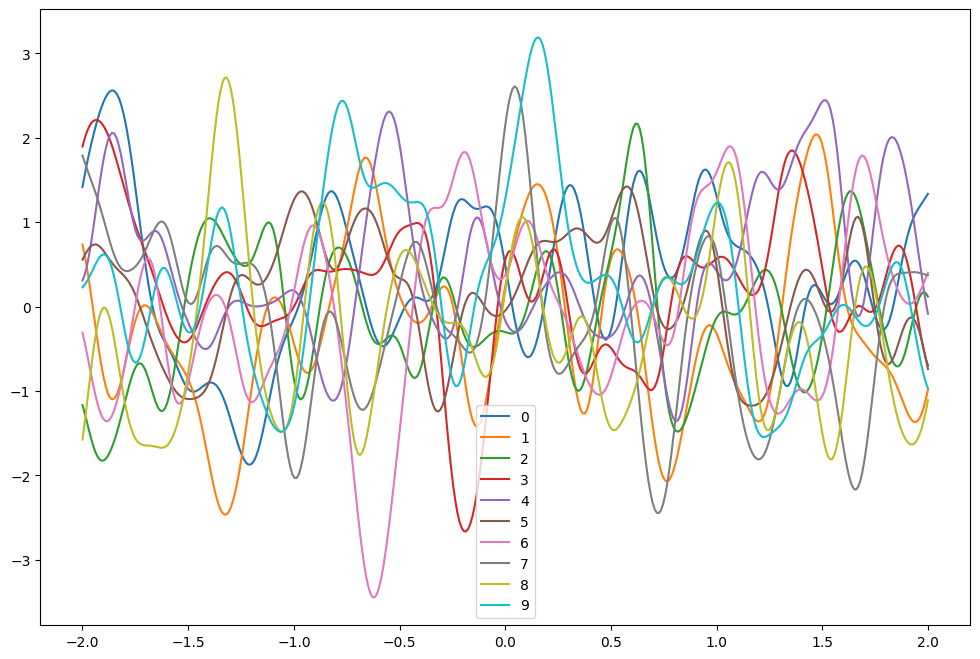

In [4]:
# GP functions with random kernel parameters
from sklearn.gaussian_process.kernels import Matern, RBF, WhiteKernel, ConstantKernel


gen_changing_kernel_params = GPDataGenerator(kernel=RBF(0.1), testing=True, batch_size=10, max_n_context=50)
np_tuple_changing_kernel = gen_changing_kernel_params.generate_batch()

n_curves = 10
fig = plt.figure(figsize=(12, 8))
for i in range(n_curves):
    x_context, y_context, x_target, y_target = np_tuple_changing_kernel[i]
    plt.plot(x_target, y_target, label=f"{i}")
plt.legend()
plt.show()

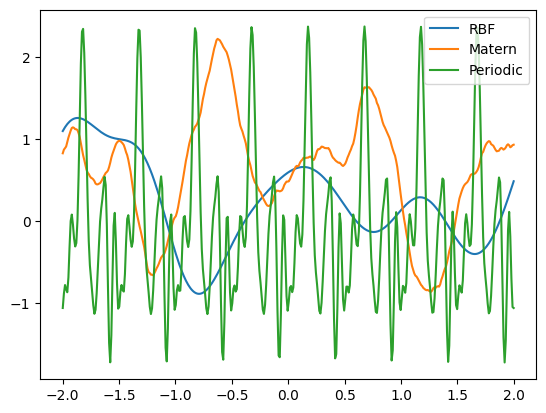

Can also randomly pick a kernel: 


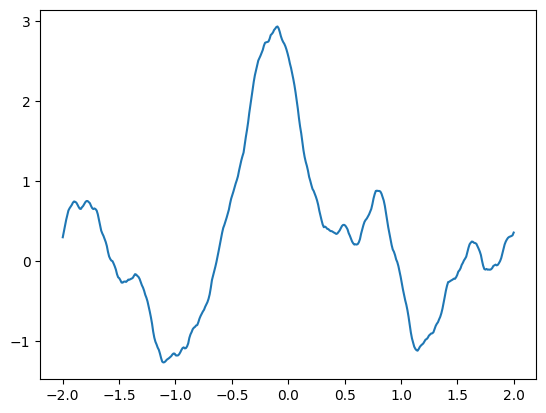

In [5]:
from sklearn.gaussian_process.kernels import Matern, RBF, ExpSineSquared

# Switching GP kernels

rbf_kernel = RBF(0.4)
matern_kernel = Matern(0.4)
periodic_kernel = ExpSineSquared(length_scale=0.4, periodicity=0.5)

gen = GPDataGenerator(kernel=rbf_kernel, batch_size=4, max_n_context=50, fix_context=True, testing=True)
np_tuple = gen.generate_batch()
for kernel in [matern_kernel, periodic_kernel]:
    gen = GPDataGenerator(kernel=kernel, batch_size=4, max_n_context=50, fix_context=True, testing=True)
    new_np_tuple = gen.generate_batch()
    np_tuple.extend(new_np_tuple)

n_curves = 3
titles = ['RBF', 'Matern', 'Periodic']
for i in range(n_curves):
    x_context, y_context, x_target, y_target = np_tuple[i * 4]
    plt.plot(x_target, y_target, label=titles[i])
plt.legend()
plt.show()

print("Can also randomly pick a kernel: ")

x_context, y_context, x_target, y_target = np_tuple.get_rand()
plt.plot(x_target, y_target)
plt.show()